In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt

# Name: Xian Liu 

# Instructions

* For math problems, you are _**encouraged**_ to use $\LaTeX,$ however handwritten solutions are also accepted provided that they are __extremely__ tidy and thorough. 
* Please make sure you explain the rationale behind each step -- this is very important because:
   1.  It shows me that you understood each step and that you are not (just) copying from a friend or a solution found online. 
   2.  It helps me understand your approach, I often see you using new approaches that are correct and also different that what I or the author came up with. 
* <font color="red"> **ALSO:** please **staple** your solutions before submitting them. </font> I will start deducting points for unstapled submissions if this continues to be a problem. Be a good friend and offer to share a stapler with a freind if they need it -- I cannot keep track of a stack of loose paper!

* Pleas make sure <font color=red> all of your code fits on the printed pages</font>, this may require breaking long lines into several shorter ones. I must see your code in order to beleive it is correct. 

# Problems

## Problem 1
4.14 (*) Show that for a linearly separable data set, the maximum likelihood solution
for the logistic regression model is obtained by finding a vector $\mathbf{w}$ whose decision
boundary $\mathbf{w}^T \phi(\mathbf{x}) = 0$ separates the classes and then taking the magnitude of $\mathbf{w}$ to
infinity.  
> **NOTE:** is this a good or a bad thing about the maximum likelihood solution...?

Please see attached.

## Problem 2
4.18 (*) Using the result (4.91) for the derivatives of the softmax activation function,
show that the gradients of the cross-entropy error (4.108) are given by (4.109).

Please see attached.

# Problem 3
Demonstrate the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class from sklearn on a *two dimensonal* slice of either:
1. The fisher iris data
2. Data from one of the kaggle competitions

You must:
1. Separate your data into five different _test_ and _training_ sets, using [Stratified Kfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) cross validation, making sure that you set the parameter to shuffle your data. 
1. For each of the 5 different folds/classifiers:
    1. Show the the way the space is partitioned, e.g. Fig 2.28 or Fig 4.5. 
        1. Include a scatter plot of the training data, using colors to indicate the different target labels. 
        1. Include a scatter plot of the test data using a different marker (e.g. squares), also using different colors to indicate expected labels. 
    1. Use the [Classification Report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) and the [Confusion Matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) to present the quality of your classifiers.

You must share code as well as figures. 
Comment on how well you think your classifier will work on a secret test set (e.g. Kaggle's test set)

> **HINT:** I do not expect this to take a large amount of code; most of what I ask is available already in scipy / sklearn

I did this in about 30 minutes and 35 lines of code (other than what I have shared with you).  Here is the output _I_ produced for the first fold. I made use of the `plot_confusion_matrix` function that I have included in this notebook for you to use as well. 

### Fold # 1 (of 5)

<img src="my-soln-plot-fold1.png">
```
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.70      0.82        10
  virginica       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30
```
<img src="my-soln-cm-fold1.png">


In [3]:
from sklearn.datasets import load_iris  # or use some other data, that is ok
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

In [4]:
from collections import namedtuple
Fold = namedtuple("Fold", "X_train X_test y_train y_test")
feature_names = ["petal length", "petal width"]

In [5]:
iris = load_iris()
labels = [l[:-5] for l in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns=labels)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
def k_fold_split(feature_names, skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=127)):
    data = iris_df.loc[:, feature_names].as_matrix()
    # data = iris.data
    target = iris.target
    folds = []
    for train_index, test_index in skf.split(data, target):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        folds.append(Fold(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))
    return folds

In [7]:
folds = k_fold_split(feature_names)

In [8]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def train_one_fold(fold, report=True):
    clf = LogisticRegression()
    clf.fit(fold.X_train, fold.y_train)
    
    # make plot
    
    x_min, y_min = fold.X_train.min(axis=0)
    x_max, y_max = fold.X_train.max(axis=0)
    
    Y, X = mgrid[y_min-0.5: y_max+0.5: 100j, x_min-0.5: x_max + 0.5: 100j]
    Z = clf.predict(column_stack((X.ravel(), Y.ravel())))
    
    figsize(12,6)
    figure()
    subplot(1,2,1)
    plt.pcolormesh(X, Y, Z.reshape(X.shape), cmap=plt.cm.Pastel1)
    
    markers = ['x', '+', 'o']
    colors = ['r', 'y', 'b']
    for target in range(3):
        train_indices = fold.y_train==target
        scatter(fold.X_train[train_indices][:, 0], fold.X_train[train_indices][:,1], marker=markers[target], color=colors[target])
        test_indices = fold.y_test==target
        scatter(fold.X_test[test_indices][:,0], fold.X_test[test_indices][:,1], marker='s', color=colors[target],facecolor="None")
   
    xlabel(feature_names[0])
    ylabel(feature_names[1])
    if report:
        # classification report
        y_pred = clf.predict(fold.X_test)
        print classification_report(fold.y_test, y_pred, target_names=iris.target_names)
        # confusion matrix
        cm = confusion_matrix(fold.y_test, y_pred)
        subplot(1,2,2)
        plot_confusion_matrix(cm, classes=iris.target_names)
    show()
    return clf

<IPython.core.display.Javascript object>


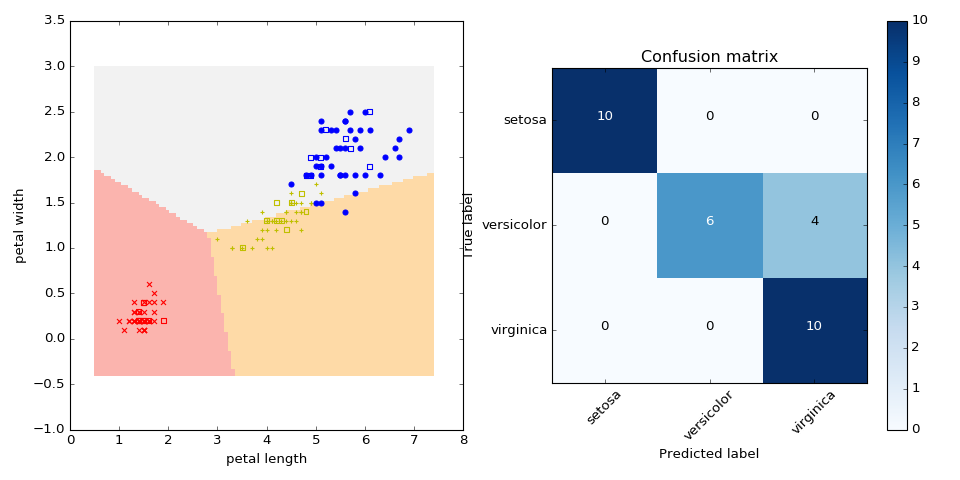

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.60      0.75        10
  virginica       0.71      1.00      0.83        10

avg / total       0.90      0.87      0.86        30



In [10]:
clfs = []
clfs.append(train_one_fold(folds[0]))

<IPython.core.display.Javascript object>


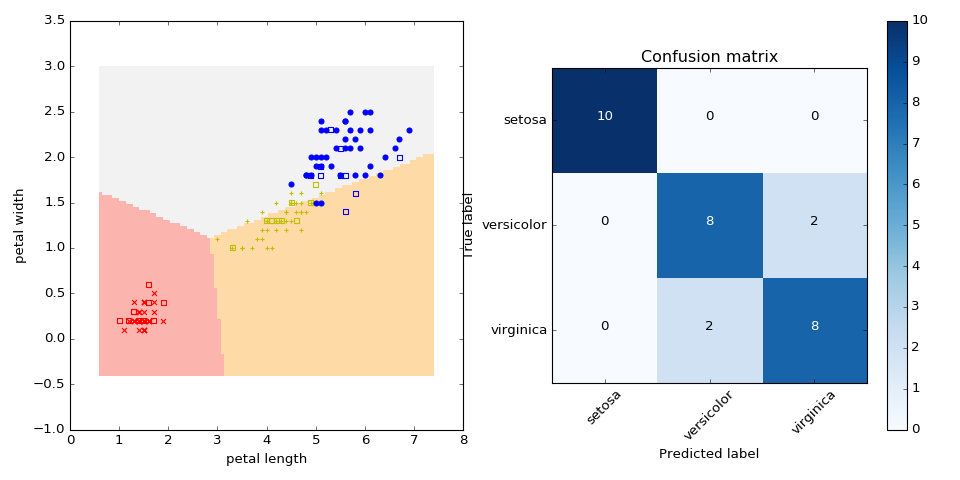

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.80      0.80      0.80        10
  virginica       0.80      0.80      0.80        10

avg / total       0.87      0.87      0.87        30



In [11]:
clfs.append(train_one_fold(folds[1]))

<IPython.core.display.Javascript object>


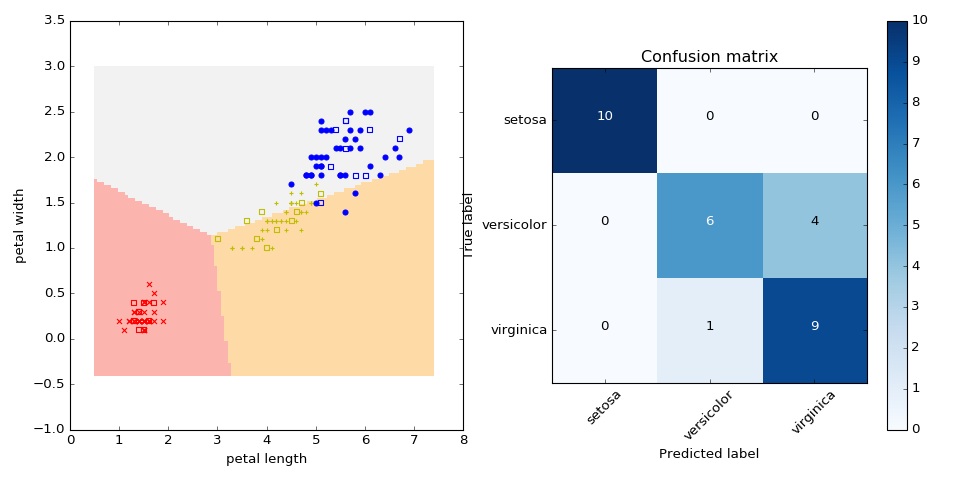

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.86      0.60      0.71        10
  virginica       0.69      0.90      0.78        10

avg / total       0.85      0.83      0.83        30



In [12]:
clfs.append(train_one_fold(folds[2]))

<IPython.core.display.Javascript object>


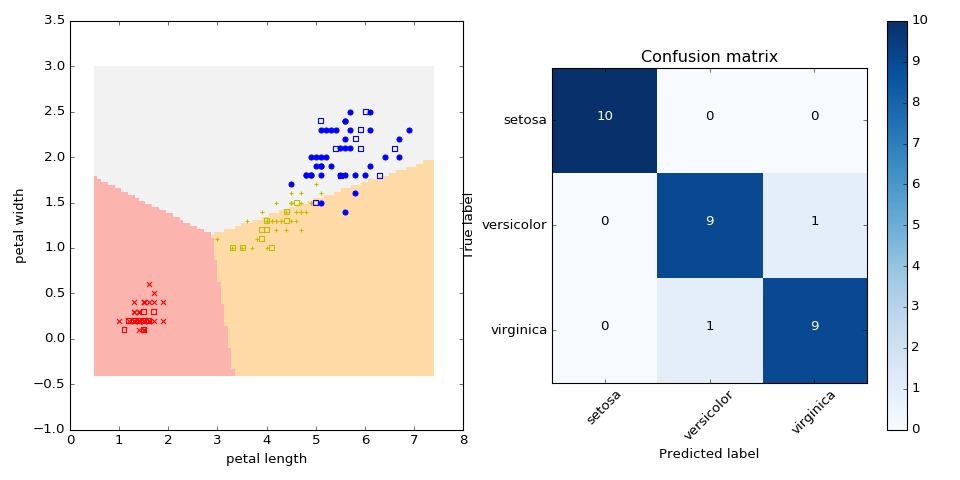

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.90      0.90      0.90        10
  virginica       0.90      0.90      0.90        10

avg / total       0.93      0.93      0.93        30



In [13]:
clfs.append(train_one_fold(folds[3]))

<IPython.core.display.Javascript object>


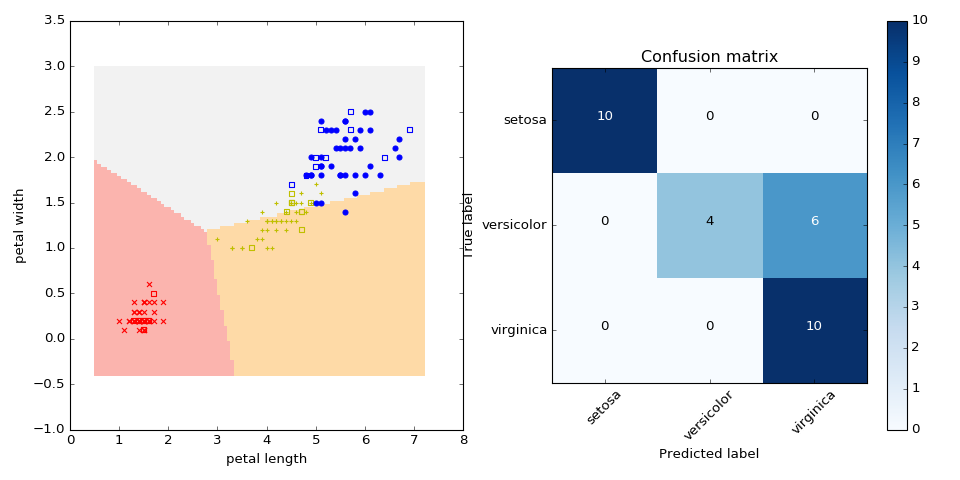

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.40      0.57        10
  virginica       0.62      1.00      0.77        10

avg / total       0.88      0.80      0.78        30



In [14]:
clfs.append(train_one_fold(folds[4]))

# Comment
* First we want to see if our classifiers are severely overfitting by comparing training f1_score with testing f_1 score
* Second we show the probabilities in the feature space

In [15]:
from sklearn.metrics import f1_score

In [16]:
# showing classifier results on test data and training data
def plot_train_vs_test_f1(folds, clfs):
    train_f1 = []
    test_f1 = []
    
    for i in range(len(folds)):
        train_f1.append(f1_score(folds[i].y_train, clfs[i].predict(folds[i].X_train), average="weighted"))
        test_f1.append(f1_score(folds[i].y_test, clfs[i].predict(folds[i].X_test), average="weighted"))
    
    xtick_labels = ["Fold {}".format(i) for i in range(1, len(folds)+1)]
    figsize(12,6)
    fig, ax = plt.subplots()
    title('F1 score: train vs. test')
    training, = ax.plot(range(1, len(folds)+1), train_f1, 'b', lw=3, label='Training')
    testing, = ax.plot(range(1, len(folds)+1), test_f1, 'r', label='Testing')
    ax.legend(loc='upper right')
    xticks(range(1, len(folds)+1), ["Fold {}".format(i) for i in range(1, len(folds)+1)])
    xlim(1 - 0.5, len(folds)+1.5)
    ylim(min(train_f1 + test_f1)*0.98, max(train_f1 + test_f1)*1.02)
    ytext = plt.ylabel('F1 Score', fontsize=14)
    print "Average F1 score mean for all folds:", np.mean((train_f1+test_f1))

<IPython.core.display.Javascript object>


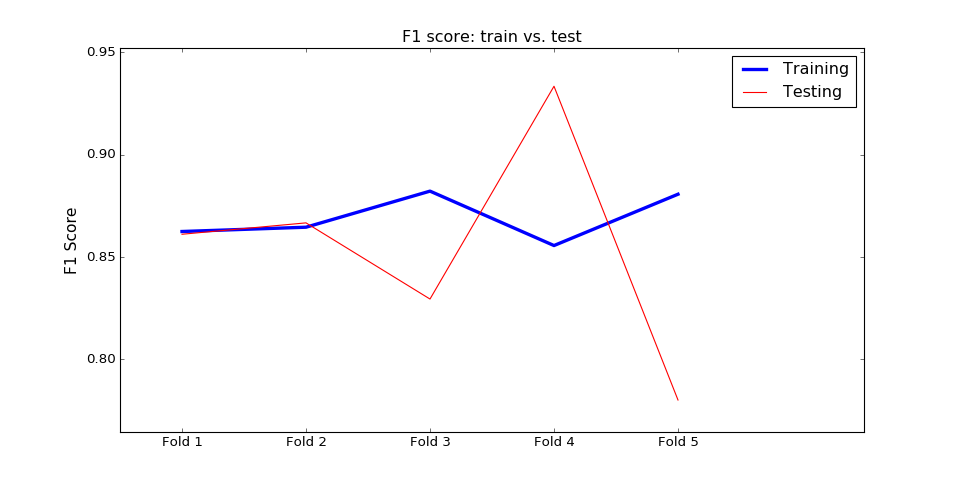

Average F1 score mean for all folds: 0.861623862998


In [17]:
plot_train_vs_test_f1(folds, clfs)

We print the coefficients of 5 classifiers to see if their weights are too big. When weights are too big, they tend to over fit.

In [18]:
for i in range(5):
    print "Classifier {} coefficients: \n {}\n".format(i+1, clfs[i].coef_)

Classifier 1 coefficients: 
 [[-1.09157997 -1.56968434]
 [ 0.56190232 -1.01206511]
 [ 0.08912477  2.21651504]]

Classifier 2 coefficients: 
 [[-1.04951725 -1.67259469]
 [ 0.71935539 -1.33523525]
 [-0.09153328  2.59098841]]

Classifier 3 coefficients: 
 [[-1.06608263 -1.59913541]
 [ 0.65558502 -1.14818657]
 [-0.01025524  2.39673653]]

Classifier 4 coefficients: 
 [[-1.06013737 -1.58572813]
 [ 0.63922511 -1.09099656]
 [-0.00294661  2.3590081 ]]

Classifier 5 coefficients: 
 [[-1.10243153 -1.56481139]
 [ 0.53040934 -0.94408748]
 [ 0.14924567  2.09209087]]



The weighted average F1 score is decent, averaging 86%. With the highest testing F1 approaching 94% and lowest around 76%. Besides, the testing vs training F1 score does not differ significantly across 5 folds, which suggests relatively uniform performance on both training data and testing data. When looking at coefficients, they are within a resonable range. This coincide with the observation that our models generalized well. Up to this point, It is safe to say that our model is not overfitting across 3 species. 

### Problem
It seems like classifier 5 did not generalize very well during testing. After going back to the original confusion matrix, the classifier 5 did poorly on the species _versicolor_. In fact, all 5 classifiers were relatively bad at _versicolor_. There are two possible reasons why this is the case: 
* _versicolor_ is linearly inseparable in the feature space from _virginica_. However, classifiers are not failing in _virginica_
* _versicolor_ has a covariance matrix that is very different from the other two, but logistic regression assumes Gaussian with the same covariance matrix.

Now we show the classifier is getting overconfident at some regions:

<IPython.core.display.Javascript object>


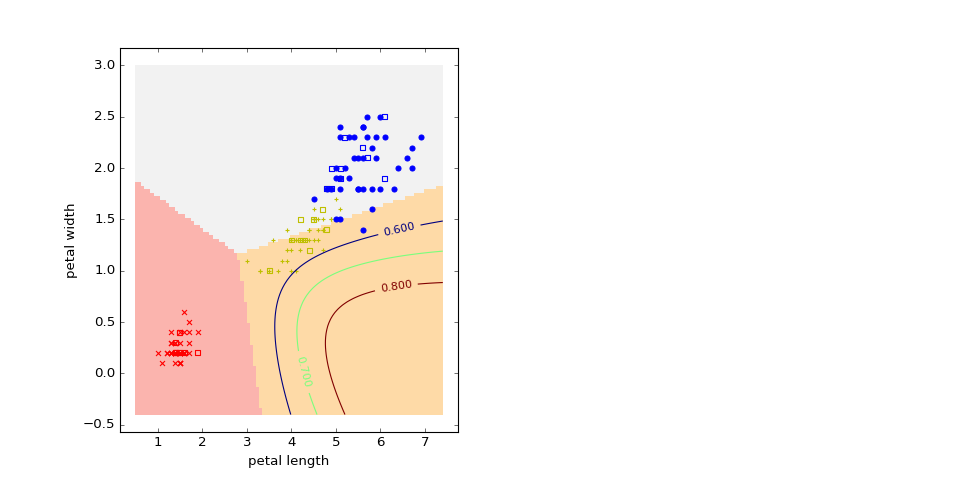

<a list of 3 text.Text objects>

In [19]:
clf = train_one_fold(folds[0], report=False)
x_min, y_min = folds[0].X_train.min(0)
x_max, y_max = folds[0].X_train.max(0)
Y, X = mgrid[y_min-0.5:y_max+0.5:100j, x_min-0.5:x_max+0.5:100j]
data = column_stack((X.ravel(), Y.ravel()))
levels = [0.6, 0.7, 0.8]
CS = plt.contour(X, Y, clf.predict_proba(data)[:,1].reshape(X.shape), levels, origin='lower')
plt.clabel(CS, inline=1, fontsize=10)

Here we show the contour lines for yellow class _versicolor_. The classifier did not catch the correct distribution of the dataset in this feature space. Especially, it is overly confident that any sample appear at the lower right corner should be _versicolor_, while no sample appears to be there.  

<IPython.core.display.Javascript object>


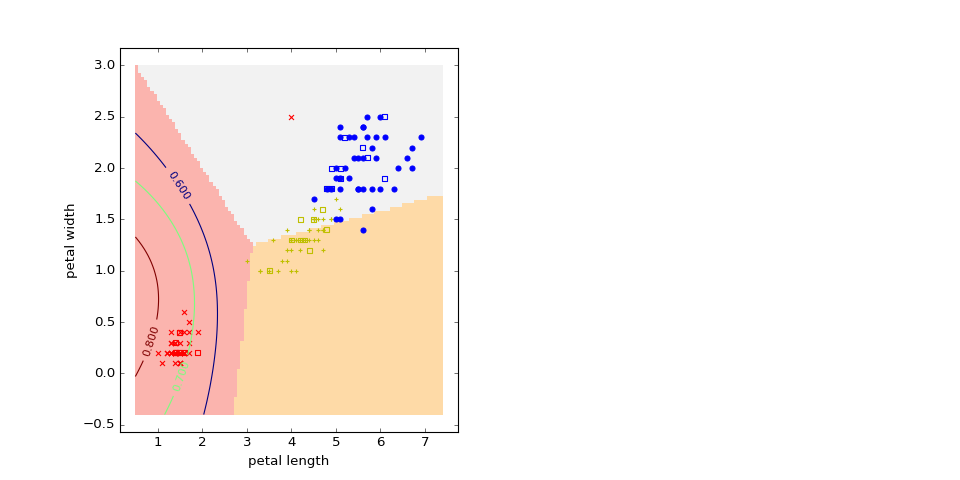

<a list of 3 text.Text objects>

In [20]:
X_train_fake = vstack((folds[0].X_train, [4.0, 2.5]))
y_train_fake = concatenate((folds[0].y_train, array([0])))

fakefold = Fold(X_train=X_train_fake, X_test=folds[0].X_test, y_train=y_train_fake, y_test=folds[0].y_test)

fakeclf = train_one_fold(fakefold, report=False)
Y, X = mgrid[y_min-0.5:y_max+0.5:100j, x_min-0.5:x_max+0.5:100j]
data = column_stack((X.ravel(), Y.ravel()))
levels = [0.6, 0.7, 0.8]
CS = plt.contour(X, Y, fakeclf.predict_proba(data)[:,0].reshape(X.shape), levels, origin='lower')
plt.clabel(CS, inline=1, fontsize=10)

I artificially implated an outlier into the first class, which my classifers are doing the best so far. We can observe here even with only one outlier, the decision boundary changes dramatically, which indicate that our classifier is not very robust. 

To conclude, logistic classifiers is heavily dependent on the training data. Especially with a small sample size, it is easily disturbed by outliers. Being overly confident is also a common issue with this method. When the dataset is carefully cleaned, logistic regression classifiers may give descent performance.